In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from math import sqrt 
from math import floor
from math import ceil
from math import exp 
import pickle
from operator import itemgetter
import time
from datetime import timedelta
import matplotlib
from matplotlib import cm, colors
from numpy import amin, amax, ravel

import pylab


In [2]:
def filter_conformations(saws ): 
    """Функция получает на вход список блужданий на плоскости, в котором каждое блуждание представлено списком из координат - кортежом.
    Осуществляет перебор списка. Вызывает функцию distance_between_saws.
    Возвращает список блужданий без повторения конформаций."""
    result = []
    result.append(saws[0])
    #result = [saws[0]]
    for i in range (1, len(saws)):
        if(i%400==0):
            print(i, end= " ")
        k=0
        for conformation in result:
            if(  distance_between_saws(conformation, saws[i] )== 0):
                k=-1
                break;
        if(k==-1):
            continue
        else:
            #if(saws[i])
            result.append(saws[i])
    return result 

In [3]:
def vector_for_distance(saw):
    """Принимает на вход конформацию(блуждание) на плоскости - список координат(кортежей).
    Возвращает вектор, описывающий данную конформацию, согласно [1]"""
    result = []
    left = [[(0,1), (-1, 0)] , [(1, 0), (0, 1)], [(0, -1), (1, 0)], [(-1, 0), (0, -1)] ]
    right = [ [(1, 0), (0, -1)], [(0,1), (1, 0)],  [(-1, 0), (0, 1)],  [(0, -1), (-1, 0)]  ]
    for i in range(2, len(saw)):
        steps = []
        dx = saw[i-1][0] - saw[i-2][0]
        dy =  saw[i-1][1] - saw[i-2][1]
        steps.append((dx, dy))
        dx = saw[i][0] - saw[i-1][0]
        dy =  saw[i][1] - saw[i-1][1]
        steps.append((dx, dy))
        if(saw[i][0] == saw[i-1][0] and saw[i-1][0]==saw[i-2][0] or saw[i][1] == saw[i-1][1] and saw[i-1][1]==saw[i-2][1]):
            result.append(0)
        elif (steps in left):
            result.append(-1)
        else:
            result.append(1)
    return result 

In [4]:
def distance_between_saws(saw1, saw2):
    """Принимает на вход два блуждания(конформации) на плоскости и возвращает целое число - расстояние между ними согласно метрике, описанной в [1].
    Вызывает функцию vector_for_distance для каждого переданного блуждания"""
    v1 = 0
    v2 = 0
    v_minus = []
    v_plus = [] 
    s1 =  vector_for_distance(saw1)
    s2= vector_for_distance(saw2)
    for i in range(len(s1)):
        v1=v1+ abs( s1[i]-s2[i])
        v2=v2+ abs( s1[i]+s2[i])
    #print(saw1, " ", s1)
    #print(saw2, " ", s2)
    #print(min(v1, v2))
    return min(v1, v2)

In [5]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def get_all_conformations(length):
    """Создает список конформаций на плоскости.  Функция принимает один аргумент - длину (число остатков).
    Возвращает список блужданий, в котором каждое блуждание представлено списком из координат
    Данный вариант работает для длин равных или больше 2."""
    #if(length==3):
        #return [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)]]
 
    if(length==2):
        return [ [[(0,0)]]  ,[[(0, 0), (1, 0)] ]]
    else:
        result = get_all_conformations(length-1)
        new_conformations = [] 
        for i in range(len(result[-1])):
            #print(i, end = "\n")
            for step in steps:
                new_point = (result[-1][i][-1][0]+step[0], result[-1][i][-1][1]+step[1] )
                if new_point in result[-1][i]:
                    #print("the same ", new_point)
                    continue
                temp = result[-1][i].copy()
                temp.append(new_point)
                new_conformations.append(temp)
        #print(length, " new  result is  ", new_conformations )
    filtered = filter_conformations(new_conformations)
    result.append(filtered)
    #print("after filter ", filtered)
    return result

In [6]:
start_time = time.monotonic()

conformations_10= get_all_conformations(10)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))
#print(conformations_10)
print(len(conformations_10))

400 400 800 1200 1600 2000 0:00:47.961247
10


In [7]:
#with open('out_new_13.pickle', 'wb') as f:
    #pickle.dump(conformations_10, f)

In [8]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def calculate_contacts(saw):
    """Функция принимает на вход конформацию на плоскости(список координат). 
    Возвращает число топологических соседей для нее """
    k=0
    for i in range(1, len(saw)-1):
        not_topological=[saw[i-1], saw[i+1]]
        for step in steps:
            new_point = (saw[i][0]+step[0], saw[i][1]+step[1] )
            if (new_point in saw and (new_point not in not_topological)):
                k=k+1
    for step in steps:
        new_point_begin = (saw[0][0]+step[0], saw[0][1]+step[1] )
        new_point_end= ( saw[-1][0]+step[0], saw[-1][1]+step[1])
        if(new_point_begin in saw and new_point_begin!=saw[1]):
            k=k+1
 
        if( new_point_end in saw and new_point_end!=saw[-2]    ):
            k=k+1
        
        
    return k//2

In [9]:
def count_saws_contact(saws):
    """Функция принимает список блужданий на плоскости. Возвращает словарь, в котором ключ - число топологических соседей,
    а значение - число таких конформаций.
    Максимальное число топологических соседей находится по формуле из [1]"""
    n=len(saws[0])
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max)
    print(t_max)
    counts ={}
    for i in range(t_max+1):
        counts.update({i :0})
    for saw in saws:
        e=calculate_contacts(saw)
        counts[e]=counts[e]+1
    return counts

In [10]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH и контакты HP/PP.
        Возвращает кортеж из двух элементов: первый элемент - число контактов НН, второй элемент - остальные контакты."""
        hh=0
        hp_pp = 0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
                    else:
                        hp_pp=hp_pp + 1 
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
        return (hh//2, hp_pp//2)

In [11]:
def get_g_m(sequence, conformations=[]):
    """Функция, которая для данной цепочки создает словарь со следующим смыслом:
    ключ - число топологических соседей НН,
    значение - число конформаций с таким количеством топологических соседей НН для данной цепочки. 
    Функция принимает готовый список конформаций, иначе сгенерирует его сама """ 
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    counts ={}
    #for i in range(t_max+1):
        #counts.update({i :0})
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    for c in conformations:
        p = Protein(sequence, c)
        
        numbers =  p.count_proteins_contacts();
        
        #if(numbers[0]==t_max):
            #print(c)
        
        if( -numbers[0] in counts): 
            counts[-numbers[0]] = counts[-numbers[0]] +1
        else:
            counts.update({-numbers[0] :1})
    
    
    
    return counts 

In [12]:
example = get_g_m([1,1,1,1,1,1,1,1,1, 1], conformations_10[-1])
maxi = max(example.keys() )
example

{0: 666, -1: 672, -2: 425, -3: 173, -4: 98}

### Предыдущий вариант подсчета 
Энергия цепочки:
$ E_\mu = -m$, где m - число топологических контактов НН в состоянии $ \mu $ 

$Z = \sum_{E=0}^{s} g(E)  exp(-(E) \frac{\epsilon}{kT} )$

s - Минимальная возможная энергия (при наибольшем числе тооплогических контактов НН). 

$\beta = \frac{\epsilon}{kT} > 0 $

In [13]:
def mean_energy(g_m_for_sequence,  e_over_t = 1 ):
      
    Z = 0
    E_mean = 0
    s = max(g_m_for_sequence.keys() )
   
        
    for g in g_m_for_sequence:
        Z=Z+exp(-g/e_over_t)*g_m_for_sequence[g]
        E_mean = E_mean + g * exp(-g/e_over_t)*g_m_for_sequence[g] 
        #Z=Z+exp(-(s-g)/e_over_t)*g_m_for_sequence[g]
        #E_mean = E_mean + (s-g) * exp(-(s-g)/e_over_t)*g_m_for_sequence[g] 
                
    E_mean=E_mean/Z
                
    return E_mean

In [14]:
sequence1 = [1,1,1,1,1,0,0,0,0,0]
sequence2 = [1,0,1,0,0,1,0,0,1,1 ]
sequence3 = [1,1,1,1,1,1,1,1,1,1 ]
g_m_for_sequence1 = get_g_m(sequence1, conformations_10[-1])
g_m_for_sequence2 = get_g_m(sequence2, conformations_10[-1])
g_m_for_sequence3 = get_g_m(sequence3, conformations_10[-1])
ts = np.linspace(0.01, 4.7, 150)
 
mean_e_on_t1 = np.zeros(len(ts))
mean_e_on_t2 = np.zeros(len(ts))
mean_e_on_t3 = np.zeros(len(ts))
for i in range(len(ts)):
    mean_e_on_t1[i] = mean_energy(g_m_for_sequence1 , ts[i])
    mean_e_on_t2[i] = mean_energy(g_m_for_sequence2 , ts[i])
    mean_e_on_t3[i] = mean_energy(g_m_for_sequence3 , ts[i]) 

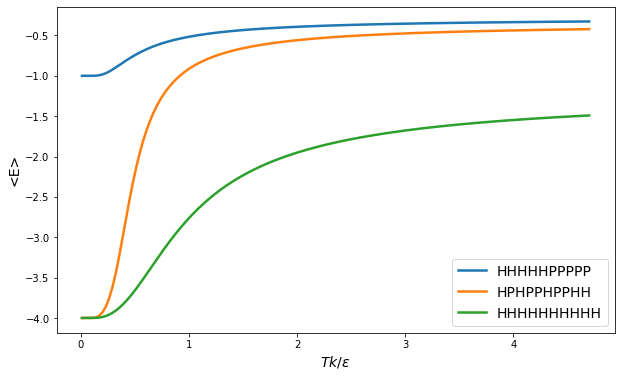

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(ts, mean_e_on_t1, '-', label ="НННННРРРРР", lw=2.5)
plt.plot(ts, mean_e_on_t2, '-', label ="НРНРРНРРНН", lw=2.5)
plt.plot(ts, mean_e_on_t3, '-', label ="НHНHHНHHНН", lw=2.5)
plt.xlabel(r"$T k/\epsilon$", fontsize = 14)
plt.ylabel(r"<E>", fontsize=14)
plt.legend(loc='best',fontsize=14)

##### + длина

In [58]:

f = 0.05

In [59]:
def mean_energy_for_n(all_g_on_n, f, e_over_t = 1 ):
      
    Z = 0
    E_mean = 0
    for  i in range(len(all_g_on_n)):  
        for g in all_g_on_n[i]:
 
            Z=Z+exp(  -(g -f*(i+1) ) /e_over_t)*all_g_on_n[i][g]
            E_mean = E_mean + (g -f*(i+1) ) * exp(   -(g -f*(i+1) ) /e_over_t)*all_g_on_n[i][g] 
        
    E_mean=E_mean/Z
                
    return E_mean

In [60]:
#sequence1 = [1,1,1,1,1,0,0,0,0,0]
sequence1 = [1,1,1,0,1,1,1,0,1,1]
sequence2 = [1,0,1,0,0,1,0,0,1,1 ]
sequence3 = [1,1,1,1,1,1,1,1,1,1 ]
sequence4 = [0,0,0,0,0,0,0,0,0,0]
#g_m_for_sequence1 = get_g_m(sequence1, conformations_10[-1])
#g_m_for_sequence2 = get_g_m(sequence2, conformations_10[-1])
#g_m_for_sequence3 = get_g_m(sequence3, conformations_10[-1])

g_m_for_sequence1 = []
g_m_for_sequence2 = []
g_m_for_sequence3 = []
g_m_for_sequence4 = []


#N = len(sequence1) 
N = 10
for i in range(N):
    g_m_for_sequence1.append( get_g_m(sequence1[:i+1], conformations_10[i]) )
    g_m_for_sequence2.append( get_g_m(sequence2[:i+1], conformations_10[i]) )
    g_m_for_sequence3.append( get_g_m(sequence3[:i+1], conformations_10[i]) )
    g_m_for_sequence4.append( get_g_m(sequence4[:i+1], conformations_10[i]) )
ts = np.linspace(0.01, 3.7, 150)
 
mean_e_on_t1 = np.zeros(len(ts))
mean_e_on_t2 = np.zeros(len(ts))
mean_e_on_t3 = np.zeros(len(ts))
mean_e_on_t4 = np.zeros(len(ts))
for i in range(len(ts)):
    mean_e_on_t1[i] = mean_energy_for_n(g_m_for_sequence1 , f,ts[i])
    mean_e_on_t2[i] = mean_energy_for_n(g_m_for_sequence2 , f,ts[i])
    mean_e_on_t3[i] = mean_energy_for_n(g_m_for_sequence3 , f,ts[i]) 
    mean_e_on_t4[i] = mean_energy_for_n(g_m_for_sequence4 , f,ts[i]) 

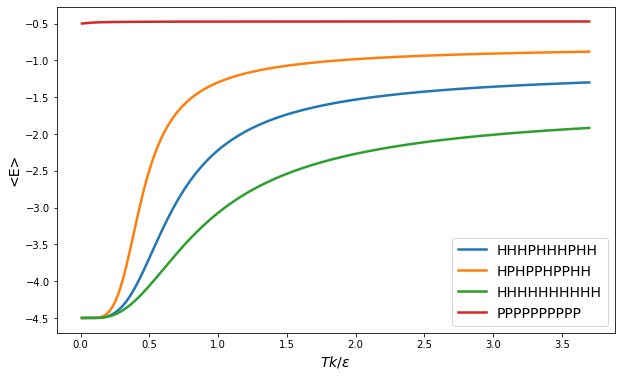

In [61]:
plt.figure(figsize=(10, 6))
#plt.plot(ts, mean_e_on_t1, '-', label ="НННННРРРРР", lw=2.5)
plt.plot(ts, mean_e_on_t1, '-', label ="НННPНHHРHH", lw=2.5)
plt.plot(ts, mean_e_on_t2, '-', label ="НРНРРНРРНН", lw=2.5)
plt.plot(ts, mean_e_on_t3, '-', label ="НHНHHНHHНН", lw=2.5)
plt.plot(ts, mean_e_on_t4, '-', label ="PPPPPPPPPP", lw=2.5)
plt.xlabel(r"$T k/\epsilon$", fontsize = 14)
plt.ylabel(r"<E>", fontsize=14)
plt.legend(loc='best',fontsize=14)

In [68]:
def mean_heat_capacity_t_n(all_g_on_n, f, e_over_t = 1):
      
    Z = 0
    E_mean = 0
    E_mean_sq = 0
    for  i in range(len(all_g_on_n)):  
        for g in all_g_on_n[i]:
 
            Z=Z+exp(  -(g -f*(i+1) ) /e_over_t)*all_g_on_n[i][g]
            E_mean = E_mean + (g -f*(i+1) ) * exp(   -(g -f*(i+1) ) /e_over_t)*all_g_on_n[i][g]
            E_mean_sq = E_mean_sq + (g -f*(i+1) )*(g -f*(i+1) ) * exp(   -(g -f*(i+1) ) /e_over_t)*all_g_on_n[i][g]
        
    E_mean=E_mean/Z
    E_mean_sq=E_mean_sq/Z

    
    return E_mean_sq - E_mean*E_mean

In [69]:
mean_heat_on_t1 = np.zeros(len(ts))
mean_heat_on_t2 = np.zeros(len(ts))
mean_heat_on_t3 = np.zeros(len(ts))
mean_heat_on_t4 = np.zeros(len(ts))
for i in range(len(ts)):
    mean_heat_on_t1[i] = mean_heat_capacity_t_n(g_m_for_sequence1 , f,ts[i])
    mean_heat_on_t2[i] = mean_heat_capacity_t_n(g_m_for_sequence2 , f,ts[i])
    mean_heat_on_t3[i] = mean_heat_capacity_t_n(g_m_for_sequence3 , f,ts[i]) 
    mean_heat_on_t4[i] = mean_heat_capacity_t_n(g_m_for_sequence4 , f,ts[i]) 

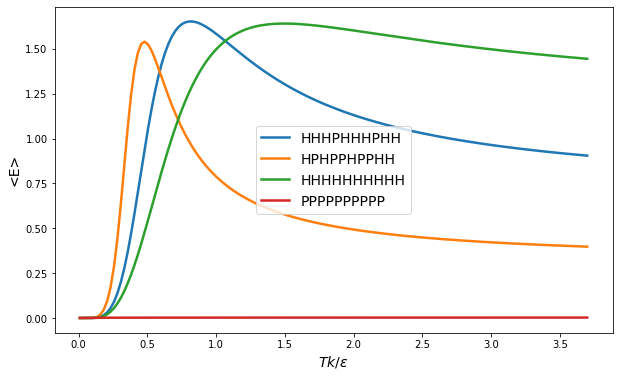

In [70]:
plt.figure(figsize=(10, 6))
#plt.plot(ts, mean_e_on_t1, '-', label ="НННННРРРРР", lw=2.5)
plt.plot(ts, mean_heat_on_t1, '-', label ="НННPНHHРHH", lw=2.5)
plt.plot(ts, mean_heat_on_t2, '-', label ="НРНРРНРРНН", lw=2.5)
plt.plot(ts, mean_heat_on_t3, '-', label ="НHНHHНHHНН", lw=2.5)
plt.plot(ts, mean_heat_on_t4, '-', label ="PPPPPPPPPP", lw=2.5)
plt.xlabel(r"$T k/\epsilon$", fontsize = 14)
plt.ylabel(r"<E>", fontsize=14)
plt.legend(loc='best',fontsize=14)

In [20]:
#with open('out_13.pickle', 'rb') as f:
    #data_new = pickle.load(f)